In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

meanshift = MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels))

[0 1 2 3 4 5 6 7]


In [3]:
# bandwidth값을 1로 바꾸니 클러스터의 갯수가 줄어들었다.
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels))

[0 1 2]


In [5]:
# 최적의 bandwidth 찾기
bandwidth = estimate_bandwidth(X, quantile=0.2)
print(round(bandwidth, 3))

1.444


In [9]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']= y

# best_bandwidth = estimate_bandwidth(X, quantile=0.2)
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels))

[0 1 2]


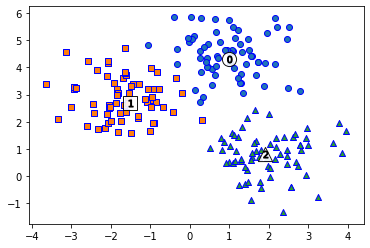

In [21]:
clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o' ,'s', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='b', marker=markers[label])
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
               edgecolors='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=50, color='k',
               edgecolors='k', marker='$%d$' % label)

In [22]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  66
Name: meanshift_label, dtype: int64
